In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

from sklearn.preprocessing import OneHotEncoder,StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,cross_val_predict
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE

In [512]:
pd.options.display.max_columns = 30
pd.options.display.max_rows = 30

In [513]:
credit_risk = pd.read_csv(r"C:\Users\deepa\Panda 2024\Credit Risk Project\Dataset\credit_risk_dataset.csv")
credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [514]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Dropping duplicate rows

In [515]:
credit_risk.duplicated().sum()

165

In [516]:
# Dropping the duplicate rows
credit_risk.drop_duplicates()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [517]:
credit_risk = credit_risk.drop_duplicates()

In [518]:
credit_risk.duplicated().sum()

0

### Dropping Unrealistic Values and Cloumns

In [519]:
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [520]:
# Unrealistic Values
# 1) Maximum person age can not be 144 years
# 2) Maximum person employment length can not be 123 years

In [521]:
credit_risk = credit_risk[(credit_risk['person_age']>=18) & (credit_risk['person_age']<=80)]
credit_risk = credit_risk[(credit_risk['person_emp_length']>=0) & (credit_risk['person_emp_length']<=50)]
credit_risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Dealing with null values

In [522]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31520 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31520 non-null  int64  
 1   person_income               31520 non-null  int64  
 2   person_home_ownership       31520 non-null  object 
 3   person_emp_length           31520 non-null  float64
 4   loan_intent                 31520 non-null  object 
 5   loan_grade                  31520 non-null  object 
 6   loan_amnt                   31520 non-null  int64  
 7   loan_int_rate               28494 non-null  float64
 8   loan_status                 31520 non-null  int64  
 9   loan_percent_income         31520 non-null  float64
 10  cb_person_default_on_file   31520 non-null  object 
 11  cb_person_cred_hist_length  31520 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


Only loan_int_rate column has null value. loan_int_rate is important column for the dataset

In [523]:
credit_risk.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3026
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [524]:
credit_risk.isna().sum()/len(credit_risk)*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.600254
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

loan_int_rate column has 9.6% of missing value so we will not directly drop it. rather we will use Iterative imputer

In [525]:
# loan_int_rate column has 9.6% of missing value so we will not directly drop it. rather we will use Iterative imputer it will be done 
# when preprocessor is apply

In [526]:
credit_risk['loan_status'].value_counts()

0    24713
1     6807
Name: loan_status, dtype: int64

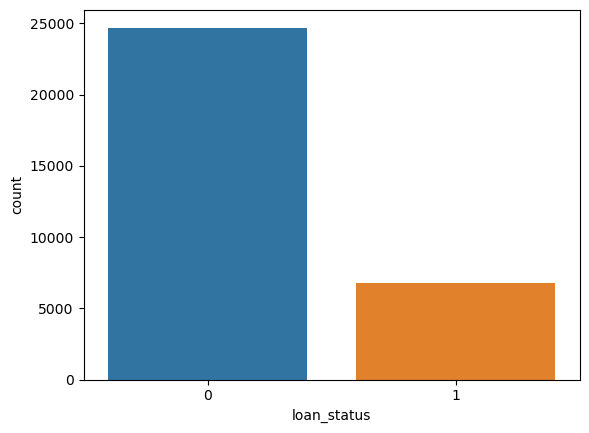

In [527]:
sns.countplot(data=credit_risk,x=credit_risk['loan_status'])
plt.show()

- From the above plot we can say that data is imbalanced
- For solving the data imbalancy, we will use undersampling and oversampling(SMOTE) technique

In [528]:
# Train Test Split
df_train,df_test = train_test_split(credit_risk,test_size=0.2,random_state=42)
print(df_train.shape,df_test.shape)

(25216, 12) (6304, 12)


In [529]:
df_train['loan_status'].value_counts()/len(df_train)*100

0    78.18052
1    21.81948
Name: loan_status, dtype: float64

In [530]:
df_test['loan_status'].value_counts()/len(df_test)*100

0    79.298858
1    20.701142
Name: loan_status, dtype: float64

In [531]:
credit_risk.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [532]:
# Converting in Dataframe
df_train = pd.DataFrame(df_train,columns=list(credit_risk.columns))
df_test = pd.DataFrame(df_test,columns=list(credit_risk.columns))

In [533]:
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
26025,27,33600,OWN,1.0,PERSONAL,B,21250,8.88,0,0.63,N,6
31415,39,182500,RENT,2.0,DEBTCONSOLIDATION,A,12500,5.42,0,0.07,N,14
25508,34,75000,RENT,2.0,VENTURE,A,12000,7.29,0,0.16,N,8
29955,39,32000,RENT,0.0,VENTURE,A,5000,9.32,0,0.16,N,12
22895,30,59500,MORTGAGE,15.0,HOMEIMPROVEMENT,A,15000,6.54,0,0.25,N,8
...,...,...,...,...,...,...,...,...,...,...,...,...
30818,37,65004,MORTGAGE,5.0,MEDICAL,B,17000,11.26,0,0.26,N,13
5619,21,45432,MORTGAGE,4.0,EDUCATION,B,5000,9.88,0,0.11,N,4
890,21,14400,RENT,1.0,VENTURE,D,1000,16.29,1,0.07,N,4
16297,25,90000,RENT,9.0,EDUCATION,B,10000,12.42,0,0.11,N,4


In [534]:
df_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
8400,24,69996,RENT,5.0,VENTURE,A,7500,7.49,0,0.11,N,2
5698,23,150000,RENT,3.0,VENTURE,B,5000,10.65,0,0.03,N,2
19163,29,45000,RENT,5.0,MEDICAL,C,2400,NaN,0,0.05,N,6
14547,25,110000,MORTGAGE,5.0,VENTURE,C,1200,13.49,0,0.01,N,4
26435,29,44500,RENT,3.0,VENTURE,C,14400,13.61,1,0.32,Y,10
...,...,...,...,...,...,...,...,...,...,...,...,...
17721,24,18000,RENT,5.0,EDUCATION,C,3000,15.27,1,0.17,N,2
29905,36,41000,MORTGAGE,6.0,DEBTCONSOLIDATION,B,6250,10.62,0,0.15,N,17
13238,24,26000,RENT,1.0,MEDICAL,B,12250,11.49,1,0.47,N,2
26467,33,102996,MORTGAGE,4.0,EDUCATION,A,6000,NaN,0,0.06,N,8


In [535]:
numerical_columns = ['person_age', 'person_income','person_emp_length', 'loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
categorical_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

In [546]:
cat_pipeline = Pipeline(
    steps=[
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("ohe",OneHotEncoder()),
    ("scaling",StandardScaler(with_mean=False))
    ]
)

num_pipeline = Pipeline(
    steps=[
    ("impute",IterativeImputer(max_iter=20)),
    ("scaling",StandardScaler())
    ]
)

In [547]:
preprocessor = ColumnTransformer([
    ("numerical_pipeline",num_pipeline,numerical_columns),
    ("categorical_pipeline",cat_pipeline,categorical_columns)
])
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('impute',
                                                  IterativeImputer(max_iter=20)),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe', OneHotEncoder()),
                                                 ('scaling',
                                                  Sta

In [548]:
X_train = df_train.drop("loan_status",axis=1)
y_train = df_train[['loan_status']]

X_test = df_test.drop("loan_status",axis=1)
y_test = df_test[['loan_status']]

print(len(X_train),len(X_train.columns))

25216 11


In [549]:
X_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
26025,27,33600,OWN,1.0,PERSONAL,B,21250,8.88,0.63,N,6
31415,39,182500,RENT,2.0,DEBTCONSOLIDATION,A,12500,5.42,0.07,N,14
25508,34,75000,RENT,2.0,VENTURE,A,12000,7.29,0.16,N,8
29955,39,32000,RENT,0.0,VENTURE,A,5000,9.32,0.16,N,12
22895,30,59500,MORTGAGE,15.0,HOMEIMPROVEMENT,A,15000,6.54,0.25,N,8
...,...,...,...,...,...,...,...,...,...,...,...
30818,37,65004,MORTGAGE,5.0,MEDICAL,B,17000,11.26,0.26,N,13
5619,21,45432,MORTGAGE,4.0,EDUCATION,B,5000,9.88,0.11,N,4
890,21,14400,RENT,1.0,VENTURE,D,1000,16.29,0.07,N,4
16297,25,90000,RENT,9.0,EDUCATION,B,10000,12.42,0.11,N,4


In [550]:
X_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
8400,24,69996,RENT,5.0,VENTURE,A,7500,7.49,0.11,N,2
5698,23,150000,RENT,3.0,VENTURE,B,5000,10.65,0.03,N,2
19163,29,45000,RENT,5.0,MEDICAL,C,2400,NaN,0.05,N,6
14547,25,110000,MORTGAGE,5.0,VENTURE,C,1200,13.49,0.01,N,4
26435,29,44500,RENT,3.0,VENTURE,C,14400,13.61,0.32,Y,10
...,...,...,...,...,...,...,...,...,...,...,...
17721,24,18000,RENT,5.0,EDUCATION,C,3000,15.27,0.17,N,2
29905,36,41000,MORTGAGE,6.0,DEBTCONSOLIDATION,B,6250,10.62,0.15,N,17
13238,24,26000,RENT,1.0,MEDICAL,B,12250,11.49,0.47,N,2
26467,33,102996,MORTGAGE,4.0,EDUCATION,A,6000,NaN,0.06,N,8


In [551]:
X_train['person_home_ownership'].value_counts()

RENT        12852
MORTGAGE    10376
OWN          1904
OTHER          84
Name: person_home_ownership, dtype: int64

In [552]:
X_train['loan_intent'].value_counts()

EDUCATION            4973
MEDICAL              4670
VENTURE              4423
PERSONAL             4275
DEBTCONSOLIDATION    4059
HOMEIMPROVEMENT      2816
Name: loan_intent, dtype: int64

In [553]:
X_train['loan_grade'].value_counts()

A    8235
B    8099
C    5026
D    2857
E     753
F     192
G      54
Name: loan_grade, dtype: int64

In [554]:
X_train['cb_person_default_on_file'].value_counts()

N    20721
Y     4495
Name: cb_person_default_on_file, dtype: int64

In [555]:
X_train_arr = preprocessor.fit_transform(X_train)
X_test_arr = preprocessor.transform(X_test)

In [556]:
print(X_train_arr.shape,X_test_arr.shape)

(25216, 26) (6304, 26)


In [557]:
# For adding the column name in the array
# You should always remember one thing = transform column name from columntransformer and column name from pd.get_dummies are always 
# in the same order , Basically they are in the same alphabatically order
arr_columns = pd.get_dummies(X_train)
arr_columns.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y'],
      dtype='object')

In [561]:
X_train_arr[:2]

array([[-0.12212834, -0.62909408, -0.93586164,  1.83768853, -0.70471409,
         4.33160326,  0.04226072,  0.        ,  0.        ,  3.78488734,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.66507495,  0.        ,  0.        ,  2.14164099,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.61279895,
         0.        ],
       [ 1.8174643 ,  2.23058832, -0.68705369,  0.45166608, -1.82898677,
        -0.93806386,  2.01567975,  0.        ,  0.        ,  0.        ,
         2.00037464,  2.72106945,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  2.13237098,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.61279895,
         0.        ]])

In [558]:
X_train_scaled = pd.DataFrame(X_train_arr,columns=list(arr_columns.columns))
X_test_scaled = pd.DataFrame(X_test_arr,columns=list(arr_columns.columns))

In [559]:
X_train_scaled

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.122128,-0.629094,-0.935862,1.837689,-0.704714,4.331603,0.042261,0.000000,0.0,3.784887,0.000000,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0
1,1.817464,2.230588,-0.687054,0.451666,-1.828987,-0.938064,2.015680,0.000000,0.0,0.000000,2.000375,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0
2,1.009301,0.166009,-0.687054,0.372465,-1.221360,-0.091153,0.535615,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0
3,1.817464,-0.659823,-1.184670,-0.736353,-0.561743,-0.091153,1.522325,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0
4,0.362770,-0.131675,2.547450,0.847672,-1.465060,0.755758,0.535615,2.032096,0.0,0.000000,0.000000,0.000000,0.000000,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,1.494199,-0.025968,0.059370,1.164478,0.068630,0.849859,1.769002,2.032096,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.57427,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0
25212,-1.091925,-0.401856,-0.189438,-0.736353,-0.379780,-0.561659,-0.451094,2.032096,0.0,0.000000,0.000000,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0
25213,-1.091925,-0.997838,-0.935862,-1.369963,1.703049,-0.938064,-0.451094,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,0.0,3.154967,0.0,0.0,0.0,2.612799,0.0
25214,-0.445394,0.454090,1.054602,0.055660,0.445553,-0.561659,-0.451094,0.000000,0.0,0.000000,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0


In [563]:
X_train_scaled.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,2.521600e+04,2.521600e+04,2.521600e+04,2.521600e+04,2.521600e+04,2.521600e+04,2.521600e+04,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000
mean,-1.786749e-16,-2.506499e-16,-8.643678e-17,-1.037411e-16,-1.978113e-16,1.710932e-16,-1.953985e-17,0.836177,0.057813,0.285788,1.019544,0.438008,0.495646,0.354562,0.476754,0.451824,0.461211,0.696386,0.687863,0.498934,0.357461,0.175446,0.087594,0.046326,2.147042,0.465757
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020,1.000020
min,-1.253557e+00,-1.197574e+00,-1.184670e+00,-1.449165e+00,-1.830717e+00,-1.596772e+00,-9.444488e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.686592e-01,-5.212942e-01,-6.870537e-01,-7.363532e-01,-8.314385e-01,-7.498615e-01,-6.977714e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.612799,0.000000
50%,-2.837611e-01,-2.079199e-01,-1.894378e-01,-2.611455e-01,-1.910272e-02,-1.852543e-01,-4.510940e-01,0.000000,0.000000,0.000000,2.000375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.612799,0.000000
75%,3.627698e-01,2.620360e-01,5.569860e-01,4.378059e-01,6.860047e-01,5.675553e-01,5.356155e-01,2.032096,0.000000,0.000000,2.000375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.132371,2.141641,0.000000,0.000000,0.000000,0.000000,0.000000,2.612799,0.000000
max,7.797875e+00,3.521584e+01,8.270032e+00,4.015724e+00,3.954844e+00,5.743121e+00,5.962518e+00,2.032096,17.354936,3.784887,2.000375,2.721069,2.513214,3.174942,2.574270,2.665075,2.629415,2.132371,2.141641,2.503207,3.154967,5.875216,11.503956,21.632501,2.612799,2.612799


In [564]:
X_test_scaled

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.607026,0.069905,0.059370,-0.340347,-1.156373,-0.561659,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,2.132371,0.000000,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000
1,-0.768659,1.606413,-0.438246,-0.736353,-0.129580,-1.314469,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000
2,0.201137,-0.410153,0.059370,-1.148200,-0.179164,-1.126266,0.042261,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,2.57427,0.0,0.000000,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000
3,-0.445394,0.838198,0.059370,-1.338283,0.793233,-1.502671,-0.451094,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000
4,0.201137,-0.419755,-0.438246,0.752631,0.832225,1.414466,1.028970,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,0.000000,2.612799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,-0.607026,-0.928698,0.059370,-1.053158,1.371616,0.002948,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.0,0.00000,0.0,0.000000,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000
6300,1.332566,-0.486974,0.308178,-0.538350,-0.139328,-0.185254,2.755712,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.0,0.00000,0.0,0.000000,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000
6301,-0.607026,-0.775055,-0.935862,0.412065,0.143364,2.825984,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,2.57427,0.0,0.000000,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000
6302,0.847668,0.703683,-0.189438,-0.577951,-0.105572,-1.032165,0.535615,2.032096,0.0,0.0,0.000000,0.000000,2.513214,0.0,0.00000,0.0,0.000000,2.132371,0.000000,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000


In [565]:
y_train.value_counts()

loan_status
0              19714
1               5502
dtype: int64

In [566]:
y_train.isna().sum()

loan_status    0
dtype: int64

In [567]:
y_train

,loan_status
26025,0
31415,0
25508,0
29955,0
22895,0
...,...
30818,0
5619,0
890,1
16297,0


In [568]:
y_train.reset_index(drop=True,inplace=True)

In [569]:
y_train

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
25211,0
25212,0
25213,1
25214,0


In [570]:
y_test

,loan_status
8400,0
5698,0
19163,0
14547,0
26435,1
...,...
17721,1
29905,0
13238,1
26467,0


In [571]:
y_test.reset_index(drop=True,inplace=True)

In [572]:
y_test

,loan_status
0,0
1,0
2,0
3,0
4,1
...,...
6299,1
6300,0
6301,1
6302,0


In [573]:
df_train_final = pd.concat([X_train_scaled,y_train],axis=1)
df_train_final

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,-0.122128,-0.629094,-0.935862,1.837689,-0.704714,4.331603,0.042261,0.000000,0.0,3.784887,0.000000,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
1,1.817464,2.230588,-0.687054,0.451666,-1.828987,-0.938064,2.015680,0.000000,0.0,0.000000,2.000375,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
2,1.009301,0.166009,-0.687054,0.372465,-1.221360,-0.091153,0.535615,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
3,1.817464,-0.659823,-1.184670,-0.736353,-0.561743,-0.091153,1.522325,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
4,0.362770,-0.131675,2.547450,0.847672,-1.465060,0.755758,0.535615,2.032096,0.0,0.000000,0.000000,0.000000,0.000000,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,1.494199,-0.025968,0.059370,1.164478,0.068630,0.849859,1.769002,2.032096,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.57427,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
25212,-1.091925,-0.401856,-0.189438,-0.736353,-0.379780,-0.561659,-0.451094,2.032096,0.0,0.000000,0.000000,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
25213,-1.091925,-0.997838,-0.935862,-1.369963,1.703049,-0.938064,-0.451094,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,0.0,3.154967,0.0,0.0,0.0,2.612799,0.0,1
25214,-0.445394,0.454090,1.054602,0.055660,0.445553,-0.561659,-0.451094,0.000000,0.0,0.000000,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0


In [574]:
df_test_final = pd.concat([X_test_scaled,y_test],axis=1)
df_test_final

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,-0.607026,0.069905,0.059370,-0.340347,-1.156373,-0.561659,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,2.132371,0.000000,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000,0
1,-0.768659,1.606413,-0.438246,-0.736353,-0.129580,-1.314469,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000,0
2,0.201137,-0.410153,0.059370,-1.148200,-0.179164,-1.126266,0.042261,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,2.57427,0.0,0.000000,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000,0
3,-0.445394,0.838198,0.059370,-1.338283,0.793233,-1.502671,-0.451094,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000,0
4,0.201137,-0.419755,-0.438246,0.752631,0.832225,1.414466,1.028970,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,0.000000,2.612799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,-0.607026,-0.928698,0.059370,-1.053158,1.371616,0.002948,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.0,0.00000,0.0,0.000000,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000,1
6300,1.332566,-0.486974,0.308178,-0.538350,-0.139328,-0.185254,2.755712,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.0,0.00000,0.0,0.000000,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000,0
6301,-0.607026,-0.775055,-0.935862,0.412065,0.143364,2.825984,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,2.57427,0.0,0.000000,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000,1
6302,0.847668,0.703683,-0.189438,-0.577951,-0.105572,-1.032165,0.535615,2.032096,0.0,0.0,0.000000,0.000000,2.513214,0.0,0.00000,0.0,0.000000,2.132371,0.000000,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000,0


### Note:-

1. All the value in the loan_int_rate column are filled by Iterative Imputer
2. On categorical column we applied the Simple Imputer -> OneHotEncoder -> StandardScaler
3. On Numeric Column, we applied the Iterative Imputer -> StandardScaler

## Undersampling

In [575]:
df_train_final

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,-0.122128,-0.629094,-0.935862,1.837689,-0.704714,4.331603,0.042261,0.000000,0.0,3.784887,0.000000,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
1,1.817464,2.230588,-0.687054,0.451666,-1.828987,-0.938064,2.015680,0.000000,0.0,0.000000,2.000375,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
2,1.009301,0.166009,-0.687054,0.372465,-1.221360,-0.091153,0.535615,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
3,1.817464,-0.659823,-1.184670,-0.736353,-0.561743,-0.091153,1.522325,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
4,0.362770,-0.131675,2.547450,0.847672,-1.465060,0.755758,0.535615,2.032096,0.0,0.000000,0.000000,0.000000,0.000000,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,1.494199,-0.025968,0.059370,1.164478,0.068630,0.849859,1.769002,2.032096,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.57427,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
25212,-1.091925,-0.401856,-0.189438,-0.736353,-0.379780,-0.561659,-0.451094,2.032096,0.0,0.000000,0.000000,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
25213,-1.091925,-0.997838,-0.935862,-1.369963,1.703049,-0.938064,-0.451094,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,0.0,3.154967,0.0,0.0,0.0,2.612799,0.0,1
25214,-0.445394,0.454090,1.054602,0.055660,0.445553,-0.561659,-0.451094,0.000000,0.0,0.000000,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0


In [576]:
df_train_final['loan_status'].value_counts()

0    19714
1     5502
Name: loan_status, dtype: int64

In [577]:
df_train_final['loan_status'].value_counts()/len(df_train_final)*100

0    78.18052
1    21.81948
Name: loan_status, dtype: float64

In [578]:
defaulter_df = df_train_final[df_train_final['loan_status']==1]
defaulter_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
9,2.463995,-0.102866,-0.438246,1.006075,0.273757,0.849859,2.755712,2.032096,0.0,0.000000,0.000000,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.875216,0.0,0.0,0.000000,2.612799,1
15,-0.607026,0.934225,-0.438246,0.372465,1.300131,-0.655760,-0.451094,2.032096,0.0,0.000000,0.000000,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,3.154967,0.000000,0.0,0.0,2.612799,0.000000,1
16,0.039504,2.144164,0.059370,2.431698,1.108419,-0.279355,0.288938,0.000000,0.0,0.000000,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,3.154967,0.000000,0.0,0.0,0.000000,2.612799,1
18,-0.768659,-0.756311,-0.189438,-0.102743,-1.149874,1.508567,-0.944449,0.000000,0.0,0.000000,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
19,-0.607026,-0.333331,0.805794,-0.419548,-1.156373,-0.279355,-0.697771,0.000000,0.0,0.000000,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25177,0.524403,-0.924089,-1.184670,-1.021478,-0.461013,0.097049,0.535615,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
25180,0.847668,-0.859559,-0.438246,0.055660,0.481296,2.731883,0.288938,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,0.000000,2.141641,0.0,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
25181,2.787261,-0.333331,0.059370,2.312896,2.593369,3.014186,1.275648,0.000000,0.0,3.784887,0.000000,0.000000,0.000000,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.875216,0.0,0.0,0.000000,2.612799,1
25189,-0.768659,-0.525385,-1.184670,-0.261145,0.994692,0.379353,-0.697771,2.032096,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,0.0,3.154967,0.000000,0.0,0.0,2.612799,0.000000,1


In [579]:
shuffled_df = df_train_final.sample(frac=1)
shuffled_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
1715,-0.445394,-0.026045,-0.189438,0.847672,0.793233,0.567555,-0.944449,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.0,0.0,0.000000,0.0,2.612799,0.0,0
11336,-0.283761,0.204420,-1.184670,1.956490,-1.465060,1.132163,-0.697771,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.000000,0.0,0.0,0.000000,0.0,2.612799,0.0,0
10259,-0.607026,-0.838817,1.054602,-0.419548,-0.139328,1.320365,-0.697771,0.000000,0.0,0.000000,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.000000,0.0,0.0,0.000000,0.0,2.612799,0.0,1
13388,-0.768659,-0.314126,-0.438246,0.055660,-0.019103,0.285252,-0.697771,2.032096,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.57427,0.000000,0.000000,0.000000,2.141641,0.000000,0.0,0.0,0.000000,0.0,2.612799,0.0,0
10064,1.009301,-0.686019,-0.189438,0.055660,-0.220562,1.508567,-0.204417,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,2.141641,0.000000,0.0,0.0,0.000000,0.0,2.612799,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19856,0.039504,-0.122072,-1.184670,-0.340347,-1.708761,-0.373457,0.535615,2.032096,0.0,0.000000,0.000000,0.000000,0.0,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.0,0.0,0.000000,0.0,2.612799,0.0,0
9197,-0.445394,-0.486897,1.054602,-0.894756,-1.393575,-0.655760,-0.697771,0.000000,0.0,3.784887,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.000000,0.0,0.0,0.000000,0.0,2.612799,0.0,0
16895,-0.445394,-0.736644,0.308178,-1.369963,-1.149874,-1.220367,-0.697771,0.000000,0.0,0.000000,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.0,0.0,0.000000,0.0,2.612799,0.0,0
8441,-0.768659,-0.314126,0.556986,0.649669,2.398408,1.038061,-0.697771,2.032096,0.0,0.000000,0.000000,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.503956,0.0,2.612799,0.0,1


In [580]:
non_defaulter_df = shuffled_df[shuffled_df['loan_status']==0][0:5502]
non_defaulter_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
1715,-0.445394,-0.026045,-0.189438,0.847672,0.793233,0.567555,-0.944449,0.000000,0.0,0.0,2.000375,0.0,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.000000,0.0,0.0,0.0,2.612799,0.000000,0
11336,-0.283761,0.204420,-1.184670,1.956490,-1.465060,1.132163,-0.697771,0.000000,0.0,0.0,2.000375,0.0,0.0,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000,0
13388,-0.768659,-0.314126,-0.438246,0.055660,-0.019103,0.285252,-0.697771,2.032096,0.0,0.0,0.000000,0.0,0.0,0.000000,2.57427,0.000000,0.000000,0.000000,2.141641,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000,0
5904,1.332566,-0.275715,3.791489,-0.209665,-0.246975,-0.091153,2.755712,2.032096,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000,0
14462,0.201137,-0.390947,-0.438246,-0.577951,0.143364,-0.373457,-0.204417,2.032096,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,2.141641,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,0.524403,0.166009,0.805794,0.942714,0.253842,0.379353,-0.204417,2.032096,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,2.141641,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000,0
24841,-0.607026,-0.256510,0.805794,0.055660,1.254640,0.191151,-0.451094,2.032096,0.0,0.0,0.000000,0.0,0.0,3.174942,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.0,0.0,0.0,2.612799,0.000000,0
22389,-0.607026,-0.832671,-0.935862,-0.736353,-0.035631,0.473454,-0.944449,0.000000,0.0,0.0,2.000375,0.0,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.000000,0.0,0.0,0.0,0.000000,2.612799,0
9135,-0.283761,2.643504,1.303410,0.887273,1.072677,-0.938064,-0.697771,2.032096,0.0,0.0,0.000000,0.0,0.0,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,2.503207,0.000000,0.0,0.0,0.0,2.612799,0.000000,0


In [581]:
undersample_df = pd.concat([defaulter_df,non_defaulter_df],axis=0)
undersample_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
9,2.463995,-0.102866,-0.438246,1.006075,0.273757,0.849859,2.755712,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.875216,0.0,0.0,0.000000,2.612799,1
15,-0.607026,0.934225,-0.438246,0.372465,1.300131,-0.655760,-0.451094,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,1
16,0.039504,2.144164,0.059370,2.431698,1.108419,-0.279355,0.288938,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,0.000000,2.612799,1
18,-0.768659,-0.756311,-0.189438,-0.102743,-1.149874,1.508567,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
19,-0.607026,-0.333331,0.805794,-0.419548,-1.156373,-0.279355,-0.697771,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,0.524403,0.166009,0.805794,0.942714,0.253842,0.379353,-0.204417,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,0.000000,2.141641,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0
24841,-0.607026,-0.256510,0.805794,0.055660,1.254640,0.191151,-0.451094,2.032096,0.0,0.0,0.000000,0.000000,0.000000,3.174942,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,0
22389,-0.607026,-0.832671,-0.935862,-0.736353,-0.035631,0.473454,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,0.000000,2.612799,0
9135,-0.283761,2.643504,1.303410,0.887273,1.072677,-0.938064,-0.697771,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0


### Outlier Removal from Undersample

In [582]:
undersample_df.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
person_age,1.000000,0.128860,0.163521,0.058675,0.009260,-0.037795,0.874893,0.032764,-0.006250,0.006841,-0.034168,-0.003979,-0.057516,0.060134,0.015987,0.015319,-0.022418,0.000983,-0.013203,0.007112,0.006959,-0.004790,0.003350,0.010084,-0.005044,0.005044,-0.027539
person_income,0.128860,1.000000,0.190997,0.348912,0.014600,-0.339997,0.099159,0.289060,0.007385,-0.031695,-0.265654,0.010939,-0.008198,0.047117,-0.042601,0.008558,-0.006976,0.007552,-0.002233,-0.021874,-0.019188,0.038264,0.031812,0.023939,-0.005284,0.005284,-0.238897
person_emp_length,0.163521,0.190997,1.000000,0.113542,-0.072166,-0.072735,0.137754,0.237915,-0.015532,0.004761,-0.230563,0.031738,-0.032348,0.007863,0.018227,-0.004838,-0.021759,0.055229,0.016160,-0.017348,-0.037586,-0.042361,-0.017763,0.019169,0.035529,-0.035529,-0.104625
loan_amnt,0.058675,0.348912,0.113542,1.000000,0.142915,0.568051,0.045788,0.088489,0.023939,-0.057374,-0.061444,0.010894,0.005392,0.008583,-0.004769,-0.012382,-0.007025,-0.111553,0.031851,-0.027061,0.036042,0.077245,0.078668,0.073450,-0.034896,0.034896,0.120102
loan_int_rate,0.009260,0.014600,-0.072166,0.142915,1.000000,0.070731,0.013240,-0.103964,0.010693,-0.041771,0.119079,0.029152,-0.040881,0.008072,0.044194,-0.035529,-0.007419,-0.732872,-0.141598,0.221575,0.476320,0.345956,0.213820,0.168607,-0.460278,0.460278,0.371689
loan_percent_income,-0.037795,-0.339997,-0.072735,0.568051,0.070731,1.000000,-0.024358,-0.213331,0.025458,0.008252,0.199354,0.000529,0.010393,-0.034375,0.013882,-0.006961,0.011151,-0.082465,0.040997,0.007926,0.010710,0.024107,0.024213,0.030525,-0.011419,0.011419,0.397602
cb_person_cred_hist_length,0.874893,0.099159,0.137754,0.045788,0.013240,-0.024358,1.000000,0.018800,-0.002134,0.005168,-0.020377,-0.003861,-0.047960,0.051599,0.009624,0.017015,-0.019675,-0.006169,-0.003728,0.009076,0.004959,-0.008011,-0.000569,0.010039,-0.004434,0.004434,-0.017224
person_home_ownership_MORTGAGE,0.032764,0.289060,0.237915,0.088489,-0.103964,-0.213331,0.018800,1.000000,-0.044901,-0.179214,-0.877200,0.031485,-0.006910,0.029046,-0.018754,0.002510,-0.034095,0.118869,-0.034340,-0.028128,-0.056770,-0.025749,0.009309,0.017461,0.042117,-0.042117,-0.230203
person_home_ownership_OTHER,-0.006250,0.007385,-0.015532,0.023939,0.010693,0.025458,-0.002134,-0.044901,1.000000,-0.015292,-0.074851,0.005488,0.001909,-0.009345,-0.005253,0.004243,0.002021,-0.009775,-0.003698,-0.001269,0.008946,0.005452,0.018252,-0.004347,-0.015758,0.015758,0.008843
person_home_ownership_OWN,0.006841,-0.031695,0.004761,-0.057374,-0.041771,0.008252,0.005168,-0.179214,-0.015292,1.000000,-0.298751,-0.086384,0.013150,0.009186,-0.006836,0.005820,0.071181,0.047704,0.003506,-0.007580,-0.051953,0.003789,-0.005306,0.004991,0.034044,-0.034044,-0.135431


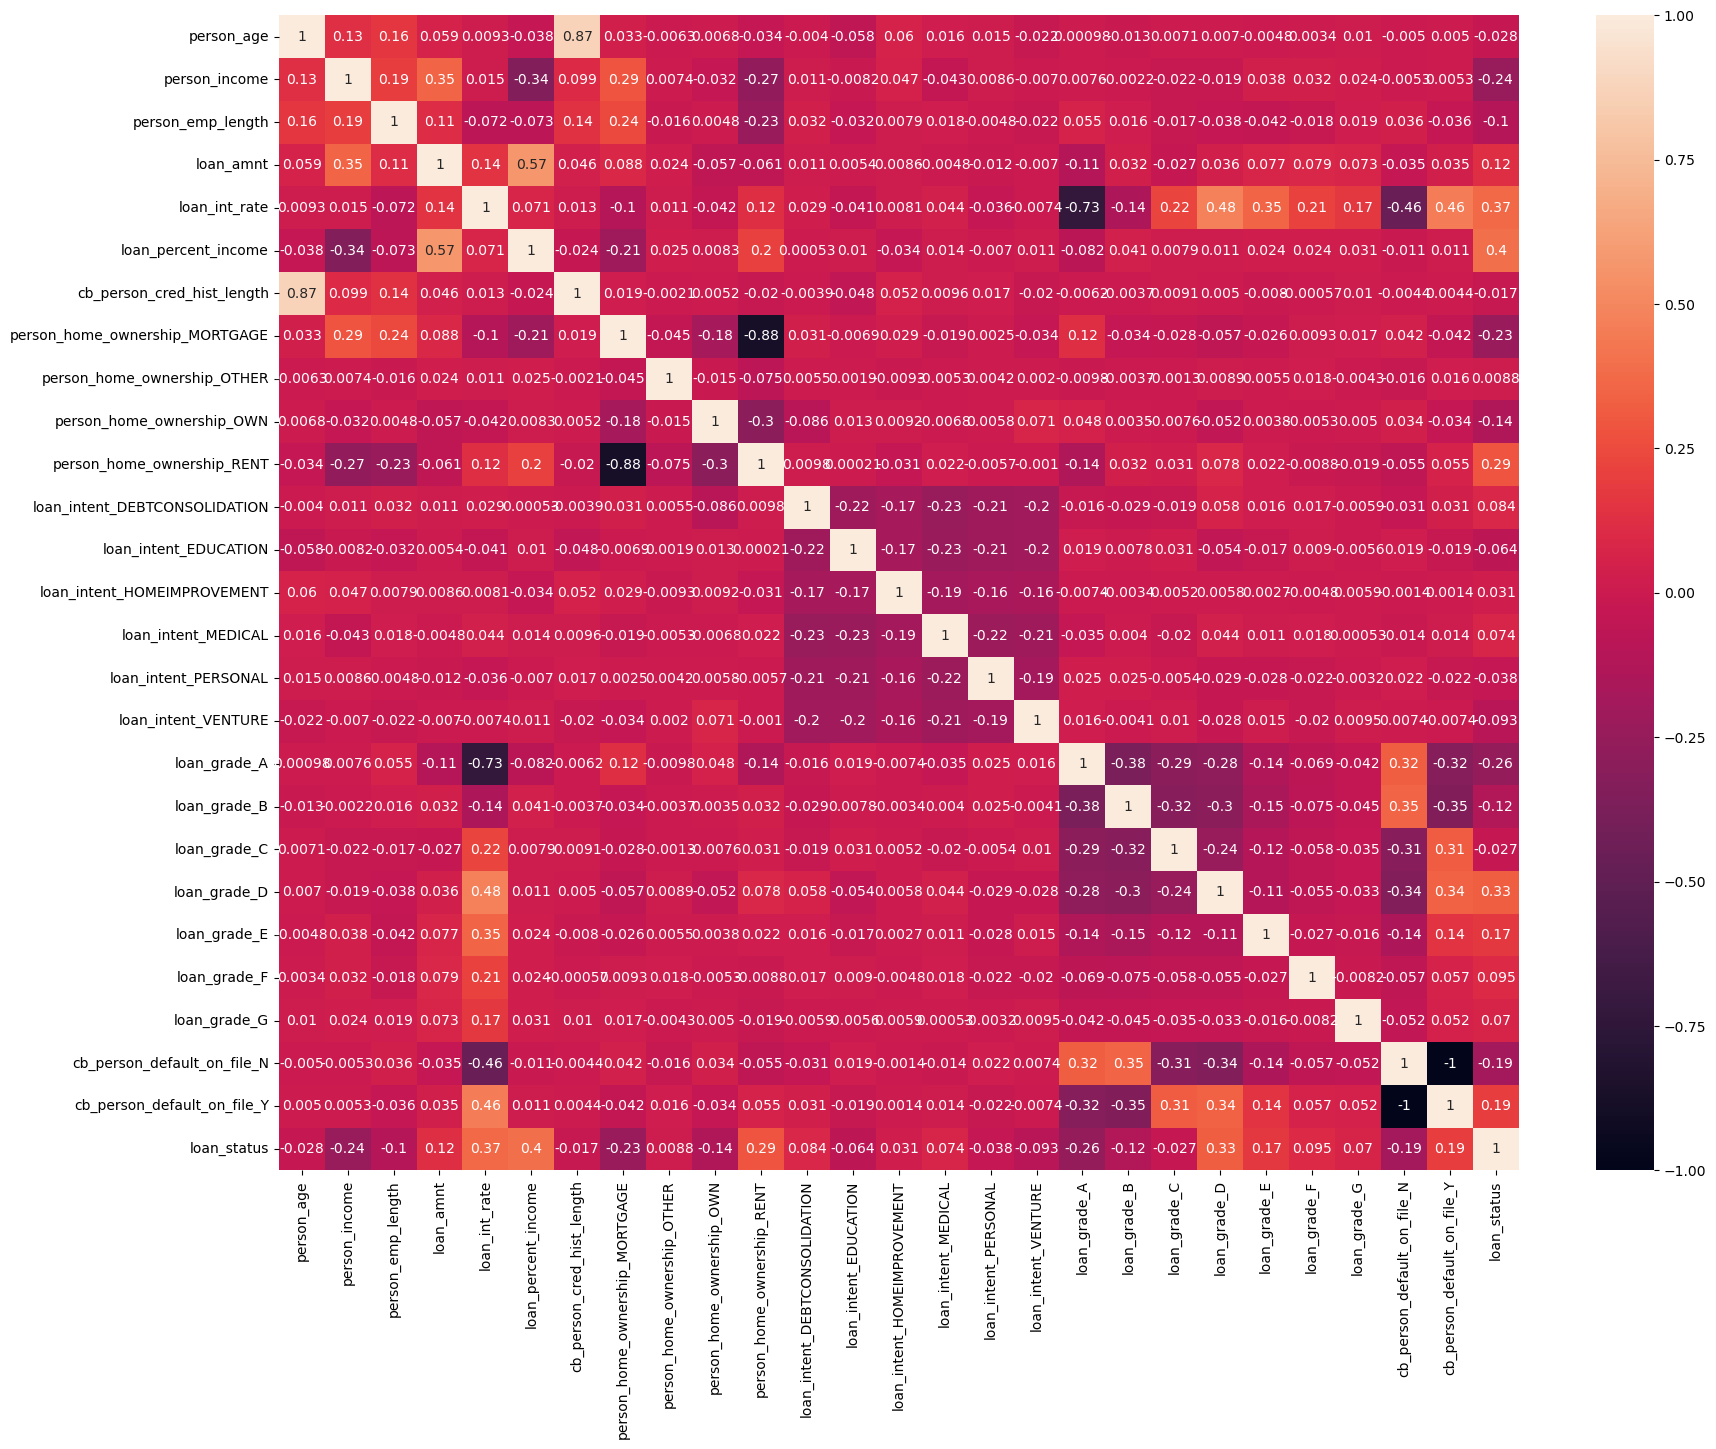

In [583]:
plt.figure(figsize=(20,15))
sns.heatmap(undersample_df.corr(),annot=True)
plt.show()

Note:-
1. Loan_int_rate is positively correlated with loan_status

In [584]:
# Outlier removal from loan_int_rate
defaulter = undersample_df[undersample_df['loan_status']==1]
print(len(defaulter))
q25, q75 = np.percentile(defaulter['loan_int_rate'],25), np.percentile(defaulter['loan_int_rate'],75)
print(f"25th percentile: {q25}, 75th percentile: {q75}")

iqr = (q75-q25)
cutoff = 1.5*iqr
print(f"Inter quartile range is: {iqr}")
print(f"Cutoff: {cutoff}")

loan_int_rate_lower = q25-cutoff
loan_int_rate_upper = q75+cutoff

print(f"Lower Cutoff: {loan_int_rate_lower}, Upper Cutoff: {loan_int_rate_upper}")

outliers = [x for x in defaulter['loan_int_rate'] if x<loan_int_rate_lower or x>loan_int_rate_upper]
print(f"Number of outliers: {len(outliers)}")
print(f"outliers: {outliers}")

undersample_df = undersample_df.drop(undersample_df[((undersample_df['loan_int_rate']>loan_int_rate_upper) | (undersample_df['loan_int_rate']<loan_int_rate_lower))].index,axis=0)
undersample_df

5502
25th percentile: -0.06762684725162803, 75th percentile: 1.38461345240001
Inter quartile range is: 1.452240299651638
Cutoff: 2.1783604494774567
Lower Cutoff: -2.245987296729085, Upper Cutoff: 3.5629739018774664
Number of outliers: 4
outliers: [3.59416668880686, 3.9548437612203307, 3.59416668880686, 3.7143923796113505]


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
9,2.463995,-0.102866,-0.438246,1.006075,0.273757,0.849859,2.755712,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.875216,0.0,0.0,0.000000,2.612799,1
15,-0.607026,0.934225,-0.438246,0.372465,1.300131,-0.655760,-0.451094,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,1
16,0.039504,2.144164,0.059370,2.431698,1.108419,-0.279355,0.288938,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,0.000000,2.612799,1
18,-0.768659,-0.756311,-0.189438,-0.102743,-1.149874,1.508567,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
19,-0.607026,-0.333331,0.805794,-0.419548,-1.156373,-0.279355,-0.697771,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,0.524403,0.166009,0.805794,0.942714,0.253842,0.379353,-0.204417,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,0.000000,2.141641,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0
24841,-0.607026,-0.256510,0.805794,0.055660,1.254640,0.191151,-0.451094,2.032096,0.0,0.0,0.000000,0.000000,0.000000,3.174942,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,0
22389,-0.607026,-0.832671,-0.935862,-0.736353,-0.035631,0.473454,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,0.000000,2.612799,0
9135,-0.283761,2.643504,1.303410,0.887273,1.072677,-0.938064,-0.697771,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0


In [587]:
# Outlier removal from loan_percent_income
defaulter = undersample_df[undersample_df['loan_status']==1]
print(len(defaulter))
q25, q75 = np.percentile(defaulter['loan_percent_income'],25), np.percentile(defaulter['loan_percent_income'],75)
print(f"25th percentile: {q25}, 75th percentile: {q75}")

iqr = (q75-q25)
cutoff = 1.5*iqr
print(f"Inter quartile range is: {iqr}")
print(cutoff)

loan_percent_income_lower = q25-cutoff
loan_percent_income_upper = q75+cutoff

print(f"Lower Cutoff: {loan_percent_income_lower}, Upper Cutoff: {loan_percent_income_upper}")

outliers = [x for x in defaulter['loan_percent_income'] if x<loan_percent_income_lower or x>loan_percent_income_upper]
print(f"Number of outliers: {len(outliers)}")
print(f"outliers: {outliers}")

undersample_df = undersample_df.drop(undersample_df[((undersample_df['loan_percent_income']>loan_percent_income_upper) | (undersample_df['loan_percent_income']<loan_percent_income_lower))].index,axis=0)
undersample_df

5498
25th percentile: -0.2793554697293303, 75th percentile: 1.602668502242884
Inter quartile range is: 1.8820239719722143
2.8230359579583215
Lower Cutoff: -3.102391427687652, Upper Cutoff: 4.425704460201206
Number of outliers: 14
outliers: [4.990311651792869, 4.519805658799816, 4.990311651792869, 4.613906857398427, 5.649020041983144, 5.178514048990091, 4.708008055997038, 4.802109254595648, 4.896210453194258, 5.554918843384534, 4.708008055997038, 5.743121240581755, 5.084412850391479, 4.708008055997038]


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
9,2.463995,-0.102866,-0.438246,1.006075,0.273757,0.849859,2.755712,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.875216,0.0,0.0,0.000000,2.612799,1
15,-0.607026,0.934225,-0.438246,0.372465,1.300131,-0.655760,-0.451094,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,1
16,0.039504,2.144164,0.059370,2.431698,1.108419,-0.279355,0.288938,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,0.000000,2.612799,1
18,-0.768659,-0.756311,-0.189438,-0.102743,-1.149874,1.508567,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
19,-0.607026,-0.333331,0.805794,-0.419548,-1.156373,-0.279355,-0.697771,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,0.524403,0.166009,0.805794,0.942714,0.253842,0.379353,-0.204417,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,0.000000,2.141641,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0
24841,-0.607026,-0.256510,0.805794,0.055660,1.254640,0.191151,-0.451094,2.032096,0.0,0.0,0.000000,0.000000,0.000000,3.174942,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,0
22389,-0.607026,-0.832671,-0.935862,-0.736353,-0.035631,0.473454,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,0.000000,2.612799,0
9135,-0.283761,2.643504,1.303410,0.887273,1.072677,-0.938064,-0.697771,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0


### Undersample Model Training

In [603]:
undersample_df = undersample_df.sample(frac=1)
undersample_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
20785,-0.768659,-0.294920,-0.438246,0.372465,2.255437,0.661657,-0.451094,0.000000,0.0,0.0,2.000375,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.875216,0.0,0.0,0.000000,2.612799,1
2234,-0.122128,0.646144,1.801026,1.006075,0.019889,-0.091153,-0.204417,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,0.000000,2.141641,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000,0
6079,-0.445394,-0.314126,-0.687054,0.055660,-1.023150,0.285252,-0.451094,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,2.132371,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000,0
22871,-0.930292,-0.400473,-0.687054,0.214062,-0.019103,0.661657,-0.944449,0.000000,0.0,0.0,2.000375,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000,0
8567,-0.283761,-0.473876,0.556986,1.322880,0.705501,2.449579,-0.697771,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.503207,0.0,0.000000,0.0,0.0,0.000000,2.612799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,-0.283761,-0.218099,0.308178,-0.577951,-1.270100,-0.561659,-0.451094,0.000000,0.0,0.0,2.000375,0.000000,0.000000,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000,0
14824,0.847668,-0.481654,-0.438246,-1.053158,-0.340788,-0.938064,0.535615,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000,1
11709,-0.283761,0.069982,-0.189438,-0.894756,0.653511,-1.032165,-0.451094,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,2.503207,0.0,0.000000,0.0,0.0,0.000000,2.612799,0
5851,0.847668,0.934225,-0.438246,0.689270,-1.630777,-0.467558,0.535615,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,2.132371,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000,0


In [604]:
undersample_x_train = undersample_df.drop("loan_status",axis=1)
undersample_y_train = undersample_df["loan_status"]
undersample_x_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
20785,-0.768659,-0.294920,-0.438246,0.372465,2.255437,0.661657,-0.451094,0.000000,0.0,0.0,2.000375,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.875216,0.0,0.0,0.000000,2.612799
2234,-0.122128,0.646144,1.801026,1.006075,0.019889,-0.091153,-0.204417,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,0.000000,2.141641,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000
6079,-0.445394,-0.314126,-0.687054,0.055660,-1.023150,0.285252,-0.451094,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,2.132371,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000
22871,-0.930292,-0.400473,-0.687054,0.214062,-0.019103,0.661657,-0.944449,0.000000,0.0,0.0,2.000375,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000
8567,-0.283761,-0.473876,0.556986,1.322880,0.705501,2.449579,-0.697771,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.503207,0.0,0.000000,0.0,0.0,0.000000,2.612799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,-0.283761,-0.218099,0.308178,-0.577951,-1.270100,-0.561659,-0.451094,0.000000,0.0,0.0,2.000375,0.000000,0.000000,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000
14824,0.847668,-0.481654,-0.438246,-1.053158,-0.340788,-0.938064,0.535615,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000
11709,-0.283761,0.069982,-0.189438,-0.894756,0.653511,-1.032165,-0.451094,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,2.503207,0.0,0.000000,0.0,0.0,0.000000,2.612799
5851,0.847668,0.934225,-0.438246,0.689270,-1.630777,-0.467558,0.535615,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,2.132371,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.612799,0.000000


In [605]:
# Converting into array
undersample_x_train = undersample_x_train.values
undersample_y_train = undersample_y_train.values

In [606]:
models = {
    "Logistic Regression":LogisticRegression(),
    "RandomForest Classifier":RandomForestClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "SVC":SVC(),
    "DecisionTree Classifier":DecisionTreeClassifier(),
    "CatBoost Classifier":CatBoostClassifier(),
    "XGB Classifier":XGBClassifier(),
    "AdaBoost Classifier":AdaBoostClassifier(),
    "GradientBoosting Classifier":GradientBoostingClassifier()
}

In [607]:
# Hyper Parameters Tunning

logistic_regression_parameters ={
    "penalty": ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
logistic_regression_grid = GridSearchCV(LogisticRegression(solver="lbfgs",max_iter=1000),param_grid=logistic_regression_parameters)
logistic_regression_grid.fit(undersample_x_train,undersample_y_train)
logistic_regression_best_parameters = logistic_regression_grid.best_estimator_
print(f"Best parameters for Logistic Regression: {logistic_regression_best_parameters}")


random_forest_parameters = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2'], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
}
random_forest_grid = GridSearchCV(RandomForestClassifier(),param_grid=random_forest_parameters)
random_forest_grid.fit(undersample_x_train,undersample_y_train)
random_forest_best_parameter = random_forest_grid.best_estimator_
print(f"Best parameters for RandomForest Classifier: {random_forest_best_parameter}")


knear_parameters = {
    "n_neighbors": list(range(2,5,1)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] 
}
knear_grid = GridSearchCV(KNeighborsClassifier(),param_grid=knear_parameters)
knear_grid.fit(undersample_x_train,undersample_y_train)
knear_best_parameters = knear_grid.best_estimator_
print(f"Best parameters for KNeighbors Classifier: {knear_best_parameters}")


svm_parameters = {
    'C': [0.5, 0.7, 0.9, 1],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}
svm_grid = GridSearchCV(SVC(),param_grid=svm_parameters)
svm_grid.fit(undersample_x_train,undersample_y_train)
svm_best_parameters = svm_grid.best_estimator_
print(f"Best parameters for SVC: {svm_best_parameters}")


tree_parameters = {
    "criterion":["gini", "entropy"],
    "splitter":['best','random'],
    'max_depth':[3,4,5,6],
    'min_samples_split':list(range(8, 20, 2)),
    'min_samples_leaf':[5,6,7],
}
tree_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=tree_parameters)
tree_grid.fit(undersample_x_train,undersample_y_train)
tree_best_parameters = tree_grid.best_estimator_
print(f"Best parameters for DecisionTree Classifier: {tree_best_parameters}")


catboost_parameters = {
    "iterations":[50,100,200],
    "learning_rate":[0.01,0.1,0.2,0.5,0.9],
    "depth":[3,6,9],
    "loss_function":["Logloss"]
}
catboost_grid = GridSearchCV(CatBoostClassifier(verbose=False),param_grid=catboost_parameters)
catboost_grid.fit(undersample_x_train,undersample_y_train)
catboost_best_parameters = catboost_grid.best_estimator_
print(f"Best parameters for Catboost Classifier: {catboost_best_parameters}")


XGBClassifier(verbose=False).fit(undersample_x_train,undersample_y_train)
AdaBoostClassifier().fit(undersample_x_train,undersample_y_train)
GradientBoostingClassifier().fit(undersample_x_train,undersample_y_train)



Best parameters for Logistic Regression: LogisticRegression(C=0.01, max_iter=1000)
Best parameters for RandomForest Classifier: RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best parameters for KNeighbors Classifier: KNeighborsClassifier(n_neighbors=4)
Best parameters for SVC: SVC(C=0.7, kernel='poly')
Best parameters for DecisionTree Classifier: DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10)
Best parameters for Catboost Classifier: <catboost.core.CatBoostClassifier object at 0x0000021D8CF64280>


C:\Users\deepa\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [08:29:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


GradientBoostingClassifier()

In [608]:
# Checking for overfitting case by cross_val_score

logistic_regression_cross_val_score = cross_val_score(logistic_regression_best_parameters,undersample_x_train,undersample_y_train,cv=5)
print(f"logistic_regression_cross_val_score: {logistic_regression_cross_val_score.mean()}")

RandomForest_Classifier_cross_val_score = cross_val_score(random_forest_best_parameter,undersample_x_train,undersample_y_train,cv=5)
print(f"RandomForest_Classifier_cross_val_score: {RandomForest_Classifier_cross_val_score.mean()}")

knear_Classifier_cross_val_score = cross_val_score(knear_best_parameters,undersample_x_train,undersample_y_train,cv=5)
print(f"knear_Classifier_cross_val_score: {knear_Classifier_cross_val_score.mean()}")


svm_Classifier_cross_val_score = cross_val_score(svm_best_parameters,undersample_x_train,undersample_y_train,cv=5)
print(f"svm_Classifier_cross_val_score: {svm_Classifier_cross_val_score.mean()}")


DecisionTree_Classifier_cross_val_score = cross_val_score(tree_best_parameters,undersample_x_train,undersample_y_train,cv=5)
print(f"DecisionTree_Classifier_cross_val_score: {DecisionTree_Classifier_cross_val_score.mean()}")


CatBoostClassifier_cross_val_score = cross_val_score(catboost_best_parameters,undersample_x_train,undersample_y_train,cv=10)
print(f"CatBoostClassifier_cross_val_score: {CatBoostClassifier_cross_val_score.mean()}")


XGB_Classifier_cross_val_score = cross_val_score(XGBClassifier(),undersample_x_train,undersample_y_train,cv=10)
print(f"XGB_Classifier_cross_val_score: {XGB_Classifier_cross_val_score.mean()}")


AdaBoost_Classifier_cross_val_score = cross_val_score(AdaBoostClassifier(),undersample_x_train,undersample_y_train,cv=5)
print(f"AdaBoost_Classifier_cross_val_score: {AdaBoost_Classifier_cross_val_score.mean()}")


GradientBoosting_Classifier_cross_val_score = cross_val_score(GradientBoostingClassifier(),undersample_x_train,undersample_y_train,cv=5)
print(f"GradientBoosting_Classifier_cross_val_score: {GradientBoosting_Classifier_cross_val_score.mean()}")

logistic_regression_cross_val_score: 0.8005461993627673
RandomForest_Classifier_cross_val_score: 0.8161128812016386


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

knear_Classifier_cross_val_score: 0.805461993627674
svm_Classifier_cross_val_score: 0.8377787892580791
DecisionTree_Classifier_cross_val_score: 0.8385980883022303
CatBoostClassifier_cross_val_score: 0.8702761742335721
XGB_Classifier_cross_val_score: 0.8741895679297789
AdaBoost_Classifier_cross_val_score: 0.8284023668639053
GradientBoosting_Classifier_cross_val_score: 0.8502503413746018


In [609]:
# Checking for best ROC_Auc_score


logistic_regression_cross_val_predict = cross_val_predict(logistic_regression_best_parameters,undersample_x_train,undersample_y_train,cv=5)
print(f"logistic_regression_ROC_AUC_score: {roc_auc_score(undersample_y_train,logistic_regression_cross_val_predict)}")

RandomForest_Classifier_cross_val_predict = cross_val_predict(random_forest_best_parameter,undersample_x_train,undersample_y_train,cv=5)
print(f"RandomForest_Classifier_ROC_AUC_score: {roc_auc_score(undersample_y_train,RandomForest_Classifier_cross_val_predict)}")

knear_Classifier_cross_val_predict = cross_val_predict(knear_best_parameters,undersample_x_train,undersample_y_train,cv=5)
print(f"knear_Classifier_ROC_AUC_score: {roc_auc_score(undersample_y_train,knear_Classifier_cross_val_predict)}")


svm_Classifier_cross_val_predict = cross_val_predict(svm_best_parameters,undersample_x_train,undersample_y_train,cv=5)
print(f"svm_Classifier_ROC_AUC_score: {roc_auc_score(undersample_y_train,svm_Classifier_cross_val_predict)}")


DecisionTree_Classifier_cross_val_predict = cross_val_predict(tree_best_parameters,undersample_x_train,undersample_y_train,cv=5)
print(f"DecisionTree_Classifier_ROC_AUC_score: {roc_auc_score(undersample_y_train,DecisionTree_Classifier_cross_val_predict)}")


CatBoostClassifier_cross_val_predict = cross_val_predict(catboost_best_parameters,undersample_x_train,undersample_y_train,cv=10)
print(f"CatBoostClassifier_ROC_AUC_score: {roc_auc_score(undersample_y_train,CatBoostClassifier_cross_val_predict)}")


XGB_Classifier_cross_val_predict = cross_val_predict(XGBClassifier(),undersample_x_train,undersample_y_train,cv=10)
print(f"XGB_Classifier_ROC_AUC_score: {roc_auc_score(undersample_y_train,XGB_Classifier_cross_val_predict)}")


AdaBoost_Classifier_cross_val_predict = cross_val_predict(AdaBoostClassifier(),undersample_x_train,undersample_y_train,cv=5)
print(f"AdaBoost_Classifier_ROC_AUC_score: {roc_auc_score(undersample_y_train,AdaBoost_Classifier_cross_val_predict)}")


GradientBoosting_Classifier_cross_val_predict = cross_val_predict(GradientBoostingClassifier(),undersample_x_train,undersample_y_train,cv=5)
print(f"GradientBoosting_Classifier_ROC_AUC_score: {roc_auc_score(undersample_y_train,GradientBoosting_Classifier_cross_val_predict)}")

logistic_regression_ROC_AUC_score: 0.8005128966008568
RandomForest_Classifier_ROC_AUC_score: 0.8200336660491806


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

knear_Classifier_ROC_AUC_score: 0.8053050098576334
svm_Classifier_ROC_AUC_score: 0.8376535809217632
DecisionTree_Classifier_ROC_AUC_score: 0.8383663516652565
CatBoostClassifier_ROC_AUC_score: 0.870187600000053
XGB_Classifier_ROC_AUC_score: 0.8741224657647949
AdaBoost_Classifier_ROC_AUC_score: 0.8283547610400654
GradientBoosting_Classifier_ROC_AUC_score: 0.8501503804559903


Note:-
    
1. The best ROC_AUC_Score is 0.8661 for XGBoostClassifier and we will use this for further calculation

In [610]:
xgb = XGBClassifier().fit(undersample_x_train,undersample_y_train)
temp = xgb.predict(undersample_x_train)
print(f"classification reprot:\n {classification_report(undersample_y_train,temp)}")
print(f"Confusion matrix:\n{confusion_matrix(undersample_y_train,temp)}")

classification reprot:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5501
           1       0.99      0.93      0.96      5484

    accuracy                           0.96     10985
   macro avg       0.96      0.96      0.96     10985
weighted avg       0.96      0.96      0.96     10985

Confusion matrix:
[[5431   70]
 [ 379 5105]]


In [611]:
xgb = CatBoostClassifier(verbose=False).fit(undersample_x_train,undersample_y_train)
prediction = xgb.predict(undersample_x_train)
print(f"classification reprot:\n {classification_report(undersample_y_train,prediction)}")
print(f"Confusion matrix:\n{confusion_matrix(undersample_y_train,prediction)}")

classification reprot:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      5501
           1       0.98      0.86      0.92      5484

    accuracy                           0.92     10985
   macro avg       0.93      0.92      0.92     10985
weighted avg       0.93      0.92      0.92     10985

Confusion matrix:
[[5390  111]
 [ 761 4723]]


In [612]:
df_test_final.loan_status.value_counts()

0    4999
1    1305
Name: loan_status, dtype: int64

In [613]:
original_x_test = df_test_final.drop("loan_status",axis=1)
original_x_test

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.607026,0.069905,0.059370,-0.340347,-1.156373,-0.561659,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,2.132371,0.000000,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000
1,-0.768659,1.606413,-0.438246,-0.736353,-0.129580,-1.314469,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000
2,0.201137,-0.410153,0.059370,-1.148200,-0.179164,-1.126266,0.042261,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,2.57427,0.0,0.000000,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000
3,-0.445394,0.838198,0.059370,-1.338283,0.793233,-1.502671,-0.451094,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000
4,0.201137,-0.419755,-0.438246,0.752631,0.832225,1.414466,1.028970,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,0.000000,2.612799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,-0.607026,-0.928698,0.059370,-1.053158,1.371616,0.002948,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.0,0.00000,0.0,0.000000,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000
6300,1.332566,-0.486974,0.308178,-0.538350,-0.139328,-0.185254,2.755712,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.0,0.00000,0.0,0.000000,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000
6301,-0.607026,-0.775055,-0.935862,0.412065,0.143364,2.825984,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,2.57427,0.0,0.000000,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000
6302,0.847668,0.703683,-0.189438,-0.577951,-0.105572,-1.032165,0.535615,2.032096,0.0,0.0,0.000000,0.000000,2.513214,0.0,0.00000,0.0,0.000000,2.132371,0.000000,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000


In [614]:
original_y_test = df_test_final['loan_status']
original_y_test

0       0
1       0
2       0
3       0
4       1
       ..
6299    1
6300    0
6301    1
6302    0
6303    0
Name: loan_status, Length: 6304, dtype: int64

In [615]:
# Converting into array
original_x_test = original_x_test.values
original_y_test = original_y_test.values

In [616]:
undersample_prediction = xgb.predict(original_x_test)
print(f"classification reprot:\n {classification_report(original_y_test,undersample_prediction)}")
print(f"Confusion matrix:\n{confusion_matrix(original_y_test,undersample_prediction)}")

classification reprot:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      4999
           1       0.76      0.79      0.78      1305

    accuracy                           0.91      6304
   macro avg       0.85      0.86      0.86      6304
weighted avg       0.91      0.91      0.91      6304

Confusion matrix:
[[4678  321]
 [ 271 1034]]


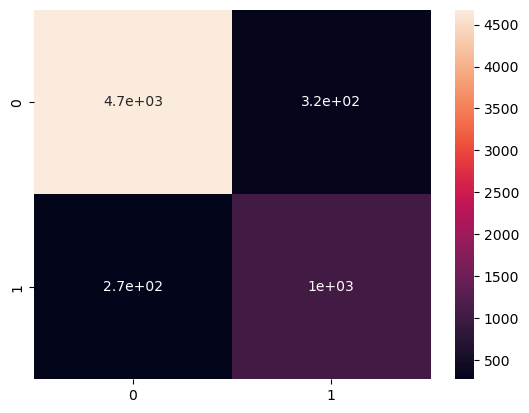

In [617]:
xgb_confusion_matrix_undersample = confusion_matrix(original_y_test,undersample_prediction)
sns.heatmap(xgb_confusion_matrix_undersample,annot=True)
plt.show()

## Oversampling Model Training (SMOTE)

In [618]:
df_train_final

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,-0.122128,-0.629094,-0.935862,1.837689,-0.704714,4.331603,0.042261,0.000000,0.0,3.784887,0.000000,0.000000,0.000000,0.000000,0.00000,2.665075,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
1,1.817464,2.230588,-0.687054,0.451666,-1.828987,-0.938064,2.015680,0.000000,0.0,0.000000,2.000375,2.721069,0.000000,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
2,1.009301,0.166009,-0.687054,0.372465,-1.221360,-0.091153,0.535615,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
3,1.817464,-0.659823,-1.184670,-0.736353,-0.561743,-0.091153,1.522325,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
4,0.362770,-0.131675,2.547450,0.847672,-1.465060,0.755758,0.535615,2.032096,0.0,0.000000,0.000000,0.000000,0.000000,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,1.494199,-0.025968,0.059370,1.164478,0.068630,0.849859,1.769002,2.032096,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.57427,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
25212,-1.091925,-0.401856,-0.189438,-0.736353,-0.379780,-0.561659,-0.451094,2.032096,0.0,0.000000,0.000000,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0
25213,-1.091925,-0.997838,-0.935862,-1.369963,1.703049,-0.938064,-0.451094,0.000000,0.0,0.000000,2.000375,0.000000,0.000000,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,0.0,3.154967,0.0,0.0,0.0,2.612799,0.0,1
25214,-0.445394,0.454090,1.054602,0.055660,0.445553,-0.561659,-0.451094,0.000000,0.0,0.000000,2.000375,0.000000,2.513214,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.0,0.000000,0.0,0.0,0.0,2.612799,0.0,0


In [619]:
df_test_final

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,-0.607026,0.069905,0.059370,-0.340347,-1.156373,-0.561659,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,2.132371,0.000000,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000,0
1,-0.768659,1.606413,-0.438246,-0.736353,-0.129580,-1.314469,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000,0
2,0.201137,-0.410153,0.059370,-1.148200,-0.179164,-1.126266,0.042261,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,2.57427,0.0,0.000000,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000,0
3,-0.445394,0.838198,0.059370,-1.338283,0.793233,-1.502671,-0.451094,2.032096,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000,0
4,0.201137,-0.419755,-0.438246,0.752631,0.832225,1.414466,1.028970,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,0.00000,0.0,2.629415,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,0.000000,2.612799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,-0.607026,-0.928698,0.059370,-1.053158,1.371616,0.002948,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,2.513214,0.0,0.00000,0.0,0.000000,0.000000,0.000000,2.503207,0.0,0.0,0.0,0.0,2.612799,0.000000,1
6300,1.332566,-0.486974,0.308178,-0.538350,-0.139328,-0.185254,2.755712,2.032096,0.0,0.0,0.000000,2.721069,0.000000,0.0,0.00000,0.0,0.000000,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000,0
6301,-0.607026,-0.775055,-0.935862,0.412065,0.143364,2.825984,-0.944449,0.000000,0.0,0.0,2.000375,0.000000,0.000000,0.0,2.57427,0.0,0.000000,0.000000,2.141641,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000,1
6302,0.847668,0.703683,-0.189438,-0.577951,-0.105572,-1.032165,0.535615,2.032096,0.0,0.0,0.000000,0.000000,2.513214,0.0,0.00000,0.0,0.000000,2.132371,0.000000,0.000000,0.0,0.0,0.0,0.0,2.612799,0.000000,0


In [620]:
df_train_final.loan_status.value_counts()

0    19714
1     5502
Name: loan_status, dtype: int64

In [621]:
oversample_x_train = df_train_final.drop("loan_status",axis=1)
oversample_y_train = df_train_final[['loan_status']]

In [622]:
# SMOTE Technique
sm = SMOTE(sampling_strategy='minority',random_state=42)

Xsm_train,ysm_train = sm.fit_resample(oversample_x_train,oversample_y_train)
Xsm_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.122128,-0.629094,-0.935862,1.837689,-0.704714,4.331603,0.042261,0.000000,0.0,3.784887,0.000000,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,2.141641,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000
1,1.817464,2.230588,-0.687054,0.451666,-1.828987,-0.938064,2.015680,0.000000,0.0,0.000000,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000
2,1.009301,0.166009,-0.687054,0.372465,-1.221360,-0.091153,0.535615,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000
3,1.817464,-0.659823,-1.184670,-0.736353,-0.561743,-0.091153,1.522325,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000
4,0.362770,-0.131675,2.547450,0.847672,-1.465060,0.755758,0.535615,2.032096,0.0,0.000000,0.000000,0.000000,0.0,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39423,-0.749477,-0.725584,0.497931,-0.773950,1.056606,0.002948,-0.727046,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.000000,0.0,0.0,0.0,0.000000,2.612799
39424,-0.287094,-0.139392,0.556986,2.141123,1.412802,1.724661,-0.083621,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.0,0.0,0.0,2.612799,0.000000
39425,-0.025133,-0.341071,0.407677,-0.577951,1.512806,-0.411088,-0.377079,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,2.503207,0.000000,0.0,0.0,0.0,2.612799,0.000000
39426,1.941751,-0.473733,-1.012205,-0.614550,-0.155297,-0.257613,1.693313,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000


In [623]:
ysm_train

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
39423,1
39424,1
39425,1
39426,1


In [624]:
ysm_train.value_counts()

loan_status
0              19714
1              19714
dtype: int64

In [625]:
oversample_df = pd.concat([Xsm_train,ysm_train],axis=1)
oversample_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
0,-0.122128,-0.629094,-0.935862,1.837689,-0.704714,4.331603,0.042261,0.000000,0.0,3.784887,0.000000,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,2.141641,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000,0
1,1.817464,2.230588,-0.687054,0.451666,-1.828987,-0.938064,2.015680,0.000000,0.0,0.000000,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000,0
2,1.009301,0.166009,-0.687054,0.372465,-1.221360,-0.091153,0.535615,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000,0
3,1.817464,-0.659823,-1.184670,-0.736353,-0.561743,-0.091153,1.522325,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000,0
4,0.362770,-0.131675,2.547450,0.847672,-1.465060,0.755758,0.535615,2.032096,0.0,0.000000,0.000000,0.000000,0.0,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39423,-0.749477,-0.725584,0.497931,-0.773950,1.056606,0.002948,-0.727046,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.000000,0.0,0.0,0.0,0.000000,2.612799,1
39424,-0.287094,-0.139392,0.556986,2.141123,1.412802,1.724661,-0.083621,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.0,0.0,0.0,2.612799,0.000000,1
39425,-0.025133,-0.341071,0.407677,-0.577951,1.512806,-0.411088,-0.377079,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,2.503207,0.000000,0.0,0.0,0.0,2.612799,0.000000,1
39426,1.941751,-0.473733,-1.012205,-0.614550,-0.155297,-0.257613,1.693313,0.000000,0.0,0.000000,2.000375,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,2.132371,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.612799,0.000000,1


In [626]:
oversample_df = oversample_df.sample(frac=1)
oversample_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
9093,0.524403,-0.717439,-1.184670,0.055660,0.877716,1.602669,0.535615,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.875216,0.0,0.0,2.612799,0.000000,1
5734,-0.122128,-0.289197,1.552218,-1.369963,-0.220562,-1.408570,0.288938,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0
8262,-0.930292,-0.909570,-0.189438,-0.577951,1.199401,1.414466,-0.697771,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,0.000000,2.612799,1
11012,-0.445394,-0.122072,0.308178,-1.148200,0.143364,-1.220367,-0.697771,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,2.141641,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0
37158,-0.865509,-0.805216,-0.836139,-0.304595,0.692558,1.410082,-0.944449,2.032096,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,0.000000,2.612799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18688,0.201137,-0.951745,-0.189438,-0.736353,-1.341585,1.226264,1.028970,0.000000,0.0,0.0,2.000375,0.000000,0.0,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
35389,0.151024,-0.404841,-0.910148,2.052783,1.077357,3.082262,0.718560,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,1
27045,-0.849998,-0.492427,0.431778,0.125408,0.677262,0.899645,-0.451094,0.000000,0.0,0.0,2.000375,0.000000,0.0,3.174942,0.00000,0.000000,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
38743,3.082957,-0.649096,-1.126420,-1.211561,2.007031,-1.032165,2.451284,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,1


In [627]:
# Outlier removal from Oversample Dataframe

defaulter = oversample_df[oversample_df['loan_status']==1]
print(len(defaulter))
q25, q75 = np.percentile(defaulter['loan_int_rate'],25), np.percentile(defaulter['loan_int_rate'],75)
print(f"25th percentile: {q25}, 75th percentile: {q75}")

iqr = (q75-q25)
cutoff = 1.5*iqr
print(f"Inter quartile range is: {iqr}")
print(f"Cutoff: {cutoff}")

loan_int_rate_lower = q25-cutoff
loan_int_rate_upper = q75+cutoff

print(f"Lower Cutoff: {loan_int_rate_lower}, Upper Cutoff: {loan_int_rate_upper}")

outliers = [x for x in defaulter['loan_int_rate'] if x<loan_int_rate_lower or x>loan_int_rate_upper]
print(f"Number of outliers: {len(outliers)}")
print(f"outliers: {outliers}")

oversample_df = oversample_df.drop(oversample_df[((oversample_df['loan_int_rate']>loan_int_rate_upper) | (oversample_df['loan_int_rate']<loan_int_rate_lower))].index,axis=0)
oversample_df

19714
25th percentile: -0.026516847908849676, 75th percentile: 1.3911121383894418
Inter quartile range is: 1.4176289862982916
Cutoff: 2.1264434794474374
Lower Cutoff: -2.152960327356287, Upper Cutoff: 3.517555617836879
Number of outliers: 6
outliers: [3.7143923796113505, 3.9548437612203307, 3.59416668880686, 3.9316420771228344, 3.658020650563865, 3.59416668880686]


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
9093,0.524403,-0.717439,-1.184670,0.055660,0.877716,1.602669,0.535615,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.875216,0.0,0.0,2.612799,0.000000,1
5734,-0.122128,-0.289197,1.552218,-1.369963,-0.220562,-1.408570,0.288938,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0
8262,-0.930292,-0.909570,-0.189438,-0.577951,1.199401,1.414466,-0.697771,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,0.000000,2.612799,1
11012,-0.445394,-0.122072,0.308178,-1.148200,0.143364,-1.220367,-0.697771,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,2.141641,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0
37158,-0.865509,-0.805216,-0.836139,-0.304595,0.692558,1.410082,-0.944449,2.032096,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,0.000000,2.612799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18688,0.201137,-0.951745,-0.189438,-0.736353,-1.341585,1.226264,1.028970,0.000000,0.0,0.0,2.000375,0.000000,0.0,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
35389,0.151024,-0.404841,-0.910148,2.052783,1.077357,3.082262,0.718560,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,1
27045,-0.849998,-0.492427,0.431778,0.125408,0.677262,0.899645,-0.451094,0.000000,0.0,0.0,2.000375,0.000000,0.0,3.174942,0.00000,0.000000,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
38743,3.082957,-0.649096,-1.126420,-1.211561,2.007031,-1.032165,2.451284,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,1


In [630]:
# Outlier removal from loan_percent_income
defaulter = oversample_df[oversample_df['loan_status']==1]
print(len(defaulter))
q25, q75 = np.percentile(defaulter['loan_percent_income'],25), np.percentile(defaulter['loan_percent_income'],75)
print(f"25th percentile: {q25}, 75th percentile: {q75}")

iqr = (q75-q25)
cutoff = 1.5*iqr
print(f"Inter quartile range is: {iqr}")
print(cutoff)

loan_percent_income_lower = q25-cutoff
loan_percent_income_upper = q75+cutoff

print(f"Lower Cutoff: {loan_percent_income_lower}, Upper Cutoff: {loan_percent_income_upper}")

outliers = [x for x in defaulter['loan_percent_income'] if x<loan_percent_income_lower or x>loan_percent_income_upper]
print(f"Number of outliers: {len(outliers)}")
print(f"outliers: {outliers}")

oversample_df = oversample_df.drop(oversample_df[((oversample_df['loan_percent_income']>loan_percent_income_upper) | (oversample_df['loan_percent_income']<loan_percent_income_lower))].index,axis=0)
oversample_df

19708
25th percentile: -0.2793554697293303, 75th percentile: 1.602668502242884
Inter quartile range is: 1.8820239719722143
2.8230359579583215
Lower Cutoff: -3.102391427687652, Upper Cutoff: 4.425704460201206
Number of outliers: 23
outliers: [5.554918843384534, 4.708008055997038, 4.532547391970338, 4.708008055997038, 4.708008055997038, 4.802109254595648, 4.481209495648691, 4.462884943331289, 4.990311651792869, 4.697942372666282, 4.59038018403011, 5.084412850391479, 5.178514048990091, 4.896210453194258, 5.649020041983144, 4.613906857398427, 4.671434803859237, 4.519805658799816, 4.653377407180589, 4.990311651792869, 4.455984472906857, 5.743121240581755, 4.457912910155934]


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_status
9093,0.524403,-0.717439,-1.184670,0.055660,0.877716,1.602669,0.535615,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.875216,0.0,0.0,2.612799,0.000000,1
5734,-0.122128,-0.289197,1.552218,-1.369963,-0.220562,-1.408570,0.288938,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0
8262,-0.930292,-0.909570,-0.189438,-0.577951,1.199401,1.414466,-0.697771,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,0.000000,2.612799,1
11012,-0.445394,-0.122072,0.308178,-1.148200,0.143364,-1.220367,-0.697771,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,2.141641,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,0
37158,-0.865509,-0.805216,-0.836139,-0.304595,0.692558,1.410082,-0.944449,2.032096,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,0.000000,2.612799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18688,0.201137,-0.951745,-0.189438,-0.736353,-1.341585,1.226264,1.028970,0.000000,0.0,0.0,2.000375,0.000000,0.0,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
35389,0.151024,-0.404841,-0.910148,2.052783,1.077357,3.082262,0.718560,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,1
27045,-0.849998,-0.492427,0.431778,0.125408,0.677262,0.899645,-0.451094,0.000000,0.0,0.0,2.000375,0.000000,0.0,3.174942,0.00000,0.000000,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,2.612799,0.000000,1
38743,3.082957,-0.649096,-1.126420,-1.211561,2.007031,-1.032165,2.451284,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000,1


In [631]:
oversample_xsm_train = oversample_df.drop("loan_status",axis=1)
oversample_xsm_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
9093,0.524403,-0.717439,-1.184670,0.055660,0.877716,1.602669,0.535615,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.875216,0.0,0.0,2.612799,0.000000
5734,-0.122128,-0.289197,1.552218,-1.369963,-0.220562,-1.408570,0.288938,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,2.141641,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000
8262,-0.930292,-0.909570,-0.189438,-0.577951,1.199401,1.414466,-0.697771,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,2.57427,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,0.000000,2.612799
11012,-0.445394,-0.122072,0.308178,-1.148200,0.143364,-1.220367,-0.697771,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,2.141641,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000
37158,-0.865509,-0.805216,-0.836139,-0.304595,0.692558,1.410082,-0.944449,2.032096,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,2.665075,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,0.000000,2.612799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18688,0.201137,-0.951745,-0.189438,-0.736353,-1.341585,1.226264,1.028970,0.000000,0.0,0.0,2.000375,0.000000,0.0,3.174942,0.00000,0.000000,0.000000,2.132371,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.612799,0.000000
35389,0.151024,-0.404841,-0.910148,2.052783,1.077357,3.082262,0.718560,0.000000,0.0,0.0,2.000375,2.721069,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000
27045,-0.849998,-0.492427,0.431778,0.125408,0.677262,0.899645,-0.451094,0.000000,0.0,0.0,2.000375,0.000000,0.0,3.174942,0.00000,0.000000,0.000000,0.000000,0.000000,2.503207,0.000000,0.000000,0.0,0.0,2.612799,0.000000
38743,3.082957,-0.649096,-1.126420,-1.211561,2.007031,-1.032165,2.451284,0.000000,0.0,0.0,2.000375,0.000000,0.0,0.000000,0.00000,0.000000,2.629415,0.000000,0.000000,0.000000,3.154967,0.000000,0.0,0.0,2.612799,0.000000


In [632]:
oversample_ysm_train = oversample_df['loan_status']
oversample_ysm_train

9093     1
5734     0
8262     1
11012    0
37158    1
        ..
18688    1
35389    1
27045    1
38743    1
11549    0
Name: loan_status, Length: 39394, dtype: int64

In [633]:
# converting into Array
oversample_xsm_train = oversample_xsm_train.values
oversample_ysm_train = oversample_ysm_train.values

In [634]:
xgb_oversample = XGBClassifier()
xgb_oversample.fit(oversample_xsm_train,oversample_ysm_train)
temp = xgb_oversample.predict(oversample_xsm_train)

print(f"classification reprot:\n {classification_report(oversample_ysm_train,temp)}")
print(f"Confusion matrix:\n{confusion_matrix(oversample_ysm_train,temp)}")

classification reprot:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     19709
           1       1.00      0.94      0.97     19685

    accuracy                           0.97     39394
   macro avg       0.97      0.97      0.97     39394
weighted avg       0.97      0.97      0.97     39394

Confusion matrix:
[[19662    47]
 [ 1159 18526]]


In [635]:
oversample_prediction = xgb_oversample.predict(original_x_test)
print(f"classification reprot:\n {classification_report(original_y_test,oversample_prediction)}")
print(f"Confusion matrix:\n{confusion_matrix(original_y_test,oversample_prediction)}")

classification reprot:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4999
           1       0.96      0.72      0.82      1305

    accuracy                           0.94      6304
   macro avg       0.94      0.86      0.89      6304
weighted avg       0.94      0.94      0.93      6304

Confusion matrix:
[[4955   44]
 [ 364  941]]


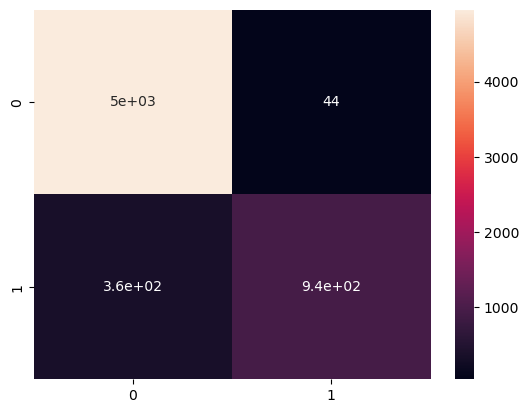

In [636]:
xgb_confusion_matrix_oversample = confusion_matrix(original_y_test,oversample_prediction)
sns.heatmap(xgb_confusion_matrix_oversample,annot=True)
plt.show()

In [664]:
print(accuracy_score(original_y_test,oversample_prediction))
print(precision_score(original_y_test,oversample_prediction))
print(recall_score(original_y_test,oversample_prediction))

0.9352791878172588
0.9553299492385787
0.7210727969348659


## Undersample Neural Network

In [637]:
import tensorflow
from keras import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.activations import sigmoid

In [638]:
undersample_x_train

array([[-0.76865922, -0.29492031, -0.43824575, ...,  0.        ,
         0.        ,  2.61279895],
       [-0.12212834,  0.64614374,  1.80102574, ...,  0.        ,
         2.61279895,  0.        ],
       [-0.44539378, -0.3141257 , -0.68705369, ...,  0.        ,
         2.61279895,  0.        ],
       ...,
       [-0.28376106,  0.06998208, -0.18943781, ...,  0.        ,
         0.        ,  2.61279895],
       [ 0.84766798,  0.93422457, -0.43824575, ...,  0.        ,
         2.61279895,  0.        ],
       [-0.76865922, -0.519777  , -0.43824575, ...,  0.        ,
         2.61279895,  0.        ]])

In [639]:
undersample_x_train.shape

(10985, 26)

In [640]:
undersample_y_train

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [641]:
undersample_y_train.shape

(10985,)

In [642]:
input_nerons = undersample_x_train.shape[1]
input_nerons

26

In [643]:
undersample_model = Sequential([Dense(input_nerons,input_dim = input_nerons,activation="relu"),
                                Dense(32,activation="relu"),
                                Dense(1,activation="sigmoid")])

C:\Users\deepa\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [644]:
undersample_model

<Sequential name=sequential_7, built=True>

In [645]:
undersample_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [646]:
undersample_model

<Sequential name=sequential_7, built=True>

In [647]:
undersample_model.fit(undersample_x_train,undersample_y_train,batch_size=100,epochs=50,shuffle=True,verbose=2)

Epoch 1/50
110/110 - 2s - 14ms/step - accuracy: 0.7100 - loss: 0.5545
Epoch 2/50
110/110 - 0s - 966us/step - accuracy: 0.8001 - loss: 0.4364
Epoch 3/50
110/110 - 0s - 941us/step - accuracy: 0.8127 - loss: 0.4124
Epoch 4/50
110/110 - 0s - 1ms/step - accuracy: 0.8230 - loss: 0.3958
Epoch 5/50
110/110 - 0s - 944us/step - accuracy: 0.8257 - loss: 0.3819
Epoch 6/50
110/110 - 0s - 1ms/step - accuracy: 0.8337 - loss: 0.3692
Epoch 7/50
110/110 - 0s - 1ms/step - accuracy: 0.8393 - loss: 0.3602
Epoch 8/50
110/110 - 0s - 1ms/step - accuracy: 0.8416 - loss: 0.3536
Epoch 9/50
110/110 - 0s - 1ms/step - accuracy: 0.8431 - loss: 0.3493
Epoch 10/50
110/110 - 0s - 927us/step - accuracy: 0.8459 - loss: 0.3443
Epoch 11/50
110/110 - 0s - 961us/step - accuracy: 0.8465 - loss: 0.3416
Epoch 12/50
110/110 - 0s - 1ms/step - accuracy: 0.8476 - loss: 0.3386
Epoch 13/50
110/110 - 0s - 926us/step - accuracy: 0.8492 - loss: 0.3351
Epoch 14/50
110/110 - 0s - 1ms/step - accuracy: 0.8491 - loss: 0.3327
Epoch 15/50
110/

In [648]:
temp = undersample_model.predict(undersample_x_train,batch_size=100)
temp = np.where(temp>0.5,1,0)
print(f"classification reprot:\n {classification_report(undersample_y_train,temp)}")
print(f"Confusion matrix:\n{confusion_matrix(undersample_y_train,temp)}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
classification reprot:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      5501
           1       0.94      0.78      0.85      5484

    accuracy                           0.87     10985
   macro avg       0.88      0.87      0.87     10985
weighted avg       0.88      0.87      0.87     10985

Confusion matrix:
[[5234  267]
 [1192 4292]]


In [649]:
neural_network_undersample_prediction = undersample_model.predict(original_x_test,batch_size=100)
neural_network_undersample_prediction = np.where(neural_network_undersample_prediction>0.5,1,0)
print(f"classification reprot:\n {classification_report(original_y_test,neural_network_undersample_prediction)}")
print(f"Confusion matrix:\n{confusion_matrix(original_y_test,neural_network_undersample_prediction)}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
classification reprot:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      4999
           1       0.71      0.74      0.73      1305

    accuracy                           0.88      6304
   macro avg       0.82      0.83      0.83      6304
weighted avg       0.89      0.88      0.89      6304

Confusion matrix:
[[4613  386]
 [ 339  966]]


<AxesSubplot:>

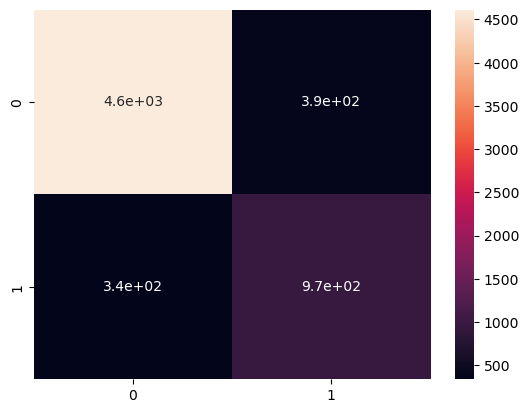

In [650]:
nn_undersample_cm = confusion_matrix(original_y_test,neural_network_undersample_prediction)
sns.heatmap(nn_undersample_cm,annot=True)

## Neural Network Oversampling (SMOTE)

In [682]:
oversample_xsm_train

array([[ 0.52440254, -0.71743886, -1.18466958, ...,  0.        ,
         2.61279895,  0.        ],
       [-0.12212834, -0.28919711,  1.5522178 , ...,  0.        ,
         2.61279895,  0.        ],
       [-0.93029194, -0.90956957, -0.18943781, ...,  0.        ,
         0.        ,  2.61279895],
       ...,
       [-0.84999763, -0.49242687,  0.43177843, ...,  0.        ,
         2.61279895,  0.        ],
       [ 3.08295724, -0.64909595, -1.12642043, ...,  0.        ,
         2.61279895,  0.        ],
       [-0.76865922, -0.12138042,  0.55698603, ...,  0.        ,
         2.61279895,  0.        ]])

In [683]:
oversample_xsm_train.shape

(39394, 26)

In [684]:
oversample_ysm_train

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [685]:
oversample_ysm_train.shape

(39394,)

In [686]:
input_nerons = oversample_xsm_train.shape[1]
input_nerons

26

In [687]:
oversample_model = Sequential([Dense(input_nerons,input_dim = input_nerons,activation="relu"),
                               Dense(32,activation="relu"),
                               Dense(1,activation="sigmoid")])

C:\Users\deepa\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [688]:
oversample_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [689]:
oversample_model.fit(oversample_xsm_train,oversample_ysm_train,batch_size=200,epochs=50,shuffle=True,verbose=2)

Epoch 1/50
197/197 - 1s - 7ms/step - accuracy: 0.7473 - loss: 0.5152
Epoch 2/50
197/197 - 0s - 1ms/step - accuracy: 0.8215 - loss: 0.4012
Epoch 3/50
197/197 - 0s - 1ms/step - accuracy: 0.8318 - loss: 0.3727
Epoch 4/50
197/197 - 0s - 1ms/step - accuracy: 0.8395 - loss: 0.3557
Epoch 5/50
197/197 - 0s - 1ms/step - accuracy: 0.8439 - loss: 0.3443
Epoch 6/50
197/197 - 0s - 1ms/step - accuracy: 0.8457 - loss: 0.3370
Epoch 7/50
197/197 - 0s - 1ms/step - accuracy: 0.8481 - loss: 0.3314
Epoch 8/50
197/197 - 0s - 1ms/step - accuracy: 0.8497 - loss: 0.3265
Epoch 9/50
197/197 - 0s - 1ms/step - accuracy: 0.8508 - loss: 0.3224
Epoch 10/50
197/197 - 0s - 1ms/step - accuracy: 0.8532 - loss: 0.3176
Epoch 11/50
197/197 - 0s - 999us/step - accuracy: 0.8548 - loss: 0.3147
Epoch 12/50
197/197 - 0s - 1ms/step - accuracy: 0.8567 - loss: 0.3111
Epoch 13/50
197/197 - 0s - 1ms/step - accuracy: 0.8575 - loss: 0.3082
Epoch 14/50
197/197 - 0s - 1ms/step - accuracy: 0.8582 - loss: 0.3052
Epoch 15/50
197/197 - 0s - 

In [690]:
temp_oversample_nn = undersample_model.predict(oversample_xsm_train,batch_size=200)
temp_oversample_nn = np.where(temp_oversample_nn>0.5,1,0)
print(f"classification reprot:\n {classification_report(oversample_ysm_train,temp_oversample_nn)}")
print(f"Confusion matrix:\n{confusion_matrix(oversample_ysm_train,temp_oversample_nn)}")

197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
classification reprot:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87     19709
           1       0.92      0.78      0.85     19685

    accuracy                           0.86     39394
   macro avg       0.87      0.86      0.86     39394
weighted avg       0.87      0.86      0.86     39394

Confusion matrix:
[[18394  1315]
 [ 4234 15451]]


In [691]:
neural_network_oversample_prediction = undersample_model.predict(original_x_test,batch_size=200)
neural_network_oversample_prediction = np.where(neural_network_oversample_prediction>0.5,1,0)
print(f"classification reprot:\n {classification_report(original_y_test,neural_network_oversample_prediction)}")
print(f"Confusion matrix:\n{confusion_matrix(original_y_test,neural_network_oversample_prediction)}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
classification reprot:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      4999
           1       0.71      0.74      0.73      1305

    accuracy                           0.88      6304
   macro avg       0.82      0.83      0.83      6304
weighted avg       0.89      0.88      0.89      6304

Confusion matrix:
[[4613  386]
 [ 339  966]]


<AxesSubplot:>

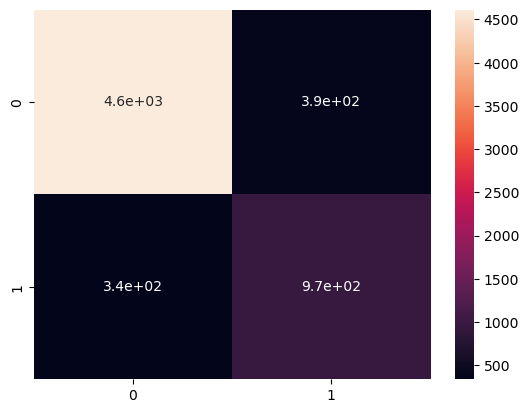

In [692]:
nn_oversample_cm = confusion_matrix(original_y_test,neural_network_oversample_prediction)
sns.heatmap(nn_oversample_cm,annot=True)